In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
## function to skip printing of max_iter warnings

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [3]:
grad_boost = GradientBoostingClassifier()

grad_boost.fit(X_train_sc, y_train)

y_pred_grad = grad_boost.predict(X_test_sc)
y_pred_grad_train = grad_boost.predict(X_train_sc)

grad_as = metrics.accuracy_score(y_test, y_pred_grad)
grad_as_train = metrics.accuracy_score(y_train, y_pred_grad_train)

print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}")



Accuracy score of test data : 0.7979319258940112
Accuracy score of train data : 0.8295478666949693


In [4]:
parameters_grad = {'learning_rate' : [0.01, 0.03, 0.05, 0.1], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600, 800]}

grad_grid = GridSearchCV(GradientBoostingClassifier(), parameters_grad, cv = 5, scoring = 'f1')


In [5]:
grad_grid_ = GradientBoostingClassifier(n_estimators = 600, max_depth = 1, learning_rate = .1)

grad_grid_.fit(X_train_sc, y_train)

y_pred_grad_grid = grad_grid_.predict(X_test_sc)
y_pred_grad_grid_train = grad_grid_.predict(X_train_sc)

grad_grid_as = metrics.accuracy_score(y_test, y_pred_grad_grid)
grad_grid_as_train = metrics.accuracy_score(y_train, y_pred_grad_grid_train)

print(f"Accuracy score of test data : {grad_grid_as}")
print(f"Accuracy score of train data : {grad_grid_as_train}")


Accuracy score of test data : 0.8005170185264971
Accuracy score of train data : 0.8136276798981108


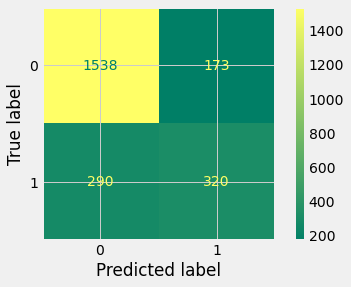

In [6]:
metrics.plot_confusion_matrix(grad_grid_, X_test_sc, y_test, cmap = 'summer', display_labels = [0, 1]);


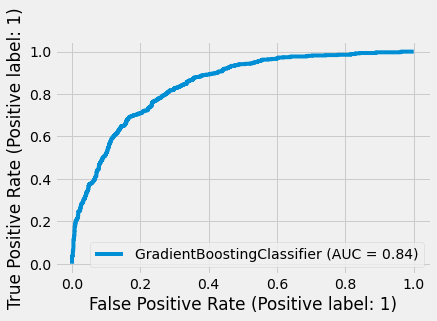

In [7]:
metrics.plot_roc_curve(grad_grid_, X_test_sc, y_test);
